**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Antonio Olvera Donlucas
*   MATRÍCULA: A01795617


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [3]:
import pandas as pd
csv = 'LaqnData.csv'

In [4]:
air_df = pd.read_csv(csv)
air_df.shape



(43800, 6)

In [11]:
air_df.columns


Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [12]:
air_df.head()


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [13]:
air_df.tail()


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [14]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [24]:
#porcentaje de valores faltante:
porcentajeisnull = (air_df.isnull().sum())/(len(air_df))*100
print(porcentajeisnull)



Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [29]:
dosnunique= air_df.nunique()
mediciones = dos['ReadingDateTime']

print(f"Mediciones:",mediciones)

Mediciones: 8760


In [32]:
mediciones = dos['Species']
print(f"Contaminantes del aire (Species):",mediciones)


Especies: 5


In [ ]:
print(f"Contaminantes del aire (Species):",mediciones)

In [5]:
air_df.nunique()
air_df=air_df.drop('Site',axis=1) # El sitio siempre es CT3

In [6]:
air_df.nunique()
air_df=air_df.drop('Provisional or Ratified',axis=1) #La columna siempre es R


In [38]:
air_df['Units'].unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [7]:
air_df=air_df.drop('Units',axis=1) 


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [43]:
conteo_de_valores = air_df['Species'].value_counts()
print(conteo_de_valores)

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64


In [44]:
air_df.nunique()

Species               5
ReadingDateTime    8760
Value              1847
dtype: int64

#

El valores del total de mediciones coincide con cada uno de los contaminanates; cada uno tiene 8760.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [48]:
Promedio_p_contaminante = air_df.groupby('Species')['Value'].mean()
print(Promedio_p_contaminante)

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [49]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
print(pvt_df)

Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [50]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


In [70]:
col1='NO2'
mayorno2 = pvt_df[col1].describe().loc['max']
fechamax = pvt_df[col1].idxmax()
print(f"El valor máximo para NO2 fue de: '{mayorno2}' ocurrió el día de: {fechamax}")

El valor máximo para NO2 fue de: '120.2' ocurrió el día de: 24/01/2017 19:00


In [71]:
col2='PM10'
minPM10 = pvt_df[col2].describe().loc['min']
fechamin = pvt_df[col2].idxmin()
print(f"El valor mínimo para PM10 fue de: '{minPM10}' ocurrió el día de: {fechamin}")

El valor mínimo para PM10 fue de: '-5.6' ocurrió el día de: 12/09/2017 23:00


In [73]:
col3 = 'NO'
mediana = pvt_df[col3].median()
print(f"La mediana para:'{col3}' es: {mediana}")

La mediana para NO'NO' es: 7.1


LO que quiere decir que la la mitad de los valores hacie arriba están por encima del 7.1

In [74]:
col4 = 'PM2.5'
primer_cuartil = pvt_df[col4].quantile(0.25)
print(f"El primer cuartil (Q1) para '{col4}' es: {primer_cuartil}")


El primer cuartil (Q1) para 'PM2.5' es: 7.0


Que quiere decir que el 25% de los datos son iguales o menores a 7

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

In [86]:
import matplotlib.pyplot as plt

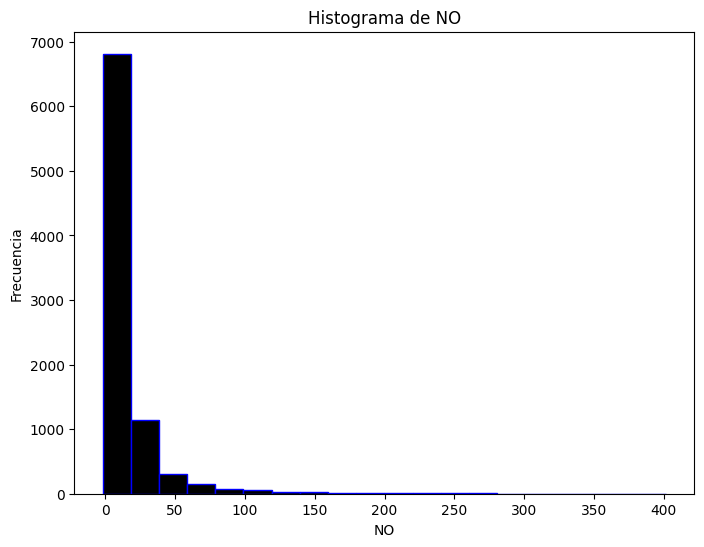

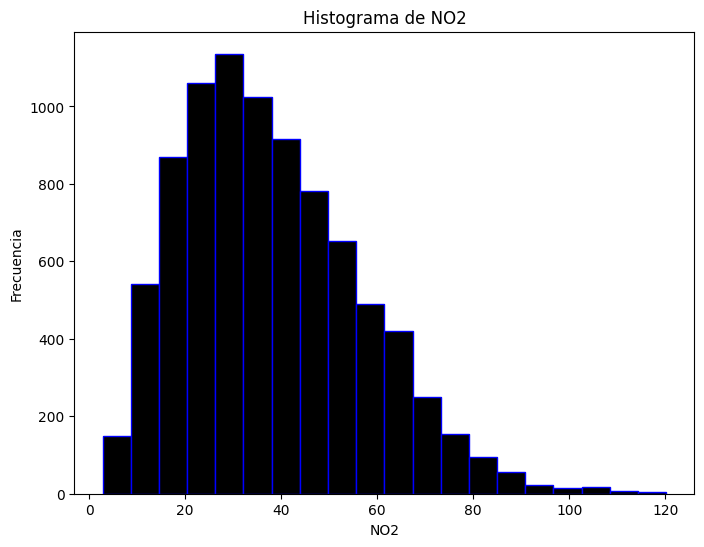

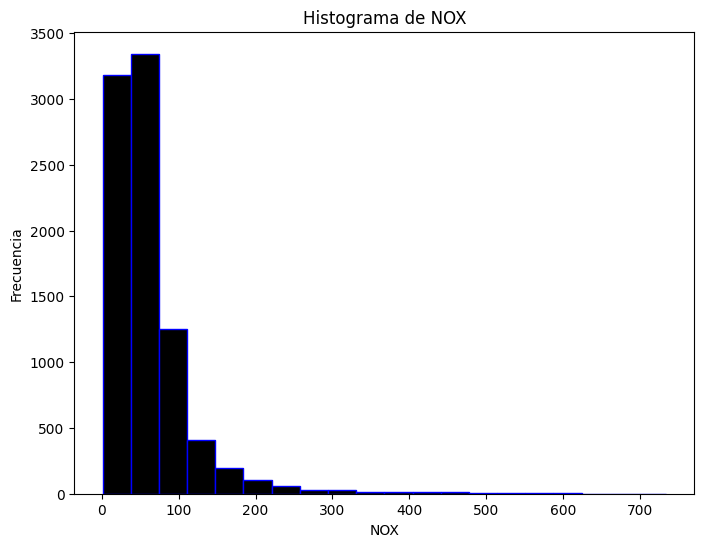

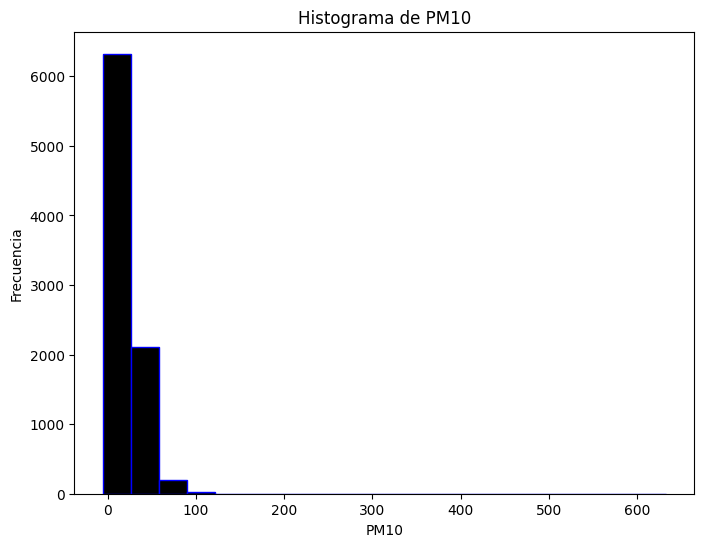

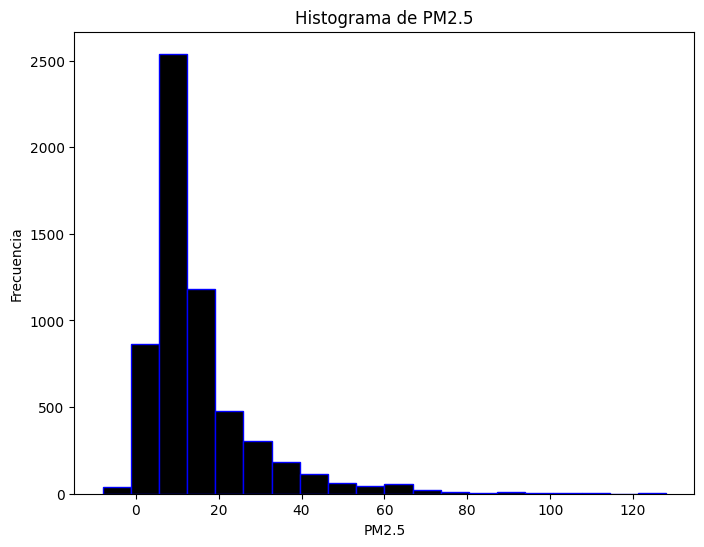

In [90]:
columnas = pvt_df.columns

for col in columnas:
    plt.figure(figsize=(8, 6))
    plt.hist(pvt_df[col], bins=20, edgecolor='blue', color='k')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

NO2 tiene más Variabilidad.

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [8]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)#separa el valor de la columna ReadingDateTime en dos. ya que está separando por el espacio.
datetime_df.columns = ['Date','Time']#Le asigana nombre a las columnas.
datetime_df #muestra el dataframe el cual solo contiene las dos columna de fecha separadas.


,Date,Time
0,01/01/2017,00:00
1,01/01/2017,01:00
2,01/01/2017,02:00
3,01/01/2017,03:00
4,01/01/2017,04:00
...,...,...
43795,31/12/2017,19:00
43796,31/12/2017,20:00
43797,31/12/2017,21:00
43798,31/12/2017,22:00


9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [9]:
date_df = datetime_df.Date.str.split('/',expand=True)#Separa la columna de Date, está vez usamos como separador el "/", dandonos como resultado tres columnas.
date_df.columns = ['Day','Month','Year']#Le asigna nombre a las columnas
date_df#Muestra el nuevo dataframe con solo estas tres columnas.


,Day,Month,Year
0,01,01,2017
1,01,01,2017
2,01,01,2017
3,01,01,2017
4,01,01,2017
...,...,...,...
43795,31,12,2017
43796,31,12,2017
43797,31,12,2017
43798,31,12,2017


In [10]:
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])#junta los dos nuevos dataframes al dataframe original, los cuales contienen separadas las columnas y 
#elimina las columnas originales.
air_df = air_df.set_index(['Month','Day','Time','Species'])#Reacomoda las columnas con la función de set_index apparte de que se muestran sin repetir las columnas para valores unicos.
air_df#muestra el dataframe original pero modificado.

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

In [11]:
air_df.unstack()#Desapila los niveles de los índices y muestra el dataframe por niveles.

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Podemos empezar por visualizar cada uno de estos. 

In [26]:
air_df_copy = pd.read_csv(csv)

In [27]:
air_df_copy

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


In [28]:
columnas_s_uso = ['Site','Units','Provisional or Ratified']
air_df_copy = air_df_copy.drop(columns=columnas_s_uso)
air_df_copy

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


In [32]:
#melt
melt_air = air_df_copy.melt(id_vars=['ReadingDateTime','Species'],var_name='Variable',value_name='Valor')
melt_air

,ReadingDateTime,Species,Variable,Valor
0,01/01/2017 00:00,NO,Value,3.5
1,01/01/2017 01:00,NO,Value,3.6
2,01/01/2017 02:00,NO,Value,2.2
3,01/01/2017 03:00,NO,Value,2.1
4,01/01/2017 04:00,NO,Value,3.3
...,...,...,...,...
43795,31/12/2017 19:00,PM2.5,Value,-2.0
43796,31/12/2017 20:00,PM2.5,Value,6.0
43797,31/12/2017 21:00,PM2.5,Value,5.0
43798,31/12/2017 22:00,PM2.5,Value,5.0


De esta forma vemos que hae un formato largo de un tadata frame es decir que identifica columas identificadoras y después hace un formato largo del mismo.

In [45]:
air_df_copy = pd.read_csv(csv)
columnas_s_uso = ['Site','Units','Provisional or Ratified']
air_df_copy = air_df_copy.drop(columns=columnas_s_uso)
air_df_copy

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


In [48]:
pvttt_df = air_df_copy.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvttt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


En este caso hace el formato a uno ancho, las fila de species la hace fila y nos da mas detalle de la información.

Para el caso de Stack y Unsatck vemos que una apila y la otra desapila, Por lo que podemos ver diferentes niveles. Contrae y edspliega. Por lo que podría decir que el método de pivot es más parecido a unstack y el de melt al de stack.